# 사이킷런(scikit-learn)을 활용한 보스턴 집값 예측 실습



## 데이터 확보하기
sklearn.datasets 라이브러리 fetch_openml 모듈을 사용하여 데이터셋 로딩

In [ ]:
# from sklearn.datasets import load_boston
from sklearn.datasets import fetch_openml
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np

boston = fetch_openml(data_id=531, as_frame=False)
data = boston.data

boston.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [ ]:
print(boston.DESCR)

**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
prices and the demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
...', Wiley, 1980.   N.B. Various transformations are used in the table on
pages 244-261 of the latter.
Variables in order:
CRIM     per capita crime rate by town
ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS    proportion of non-retail business acres per town
CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX      nitric oxides concentration (parts per 10 million)
RM       average number of rooms per dwelling
AGE      proportion of owner-occupied units built prior to 1940
DIS      weighted distances to five Boston employment centres
RAD      index of accessibility to radial highways
TAX      full-value property-tax rate per $10

### 데이타 추출

In [ ]:
boston['data']  #특성(피쳐)13개의 데이터셋

array([[0.00632, 18.0, 2.31, ..., 15.3, 396.9, 4.98],
       [0.02731, 0.0, 7.07, ..., 17.8, 396.9, 9.14],
       [0.02729, 0.0, 7.07, ..., 17.8, 392.83, 4.03],
       ...,
       [0.06076, 0.0, 11.93, ..., 21.0, 396.9, 5.64],
       [0.10959, 0.0, 11.93, ..., 21.0, 393.45, 6.48],
       [0.04741, 0.0, 11.93, ..., 21.0, 396.9, 7.88]], dtype=object)

In [ ]:
boston.feature_names #피쳐 이름

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

### target 값 2D로 변형

In [ ]:
boston.target_names #타겟 이름

['MEDV']

In [ ]:
boston.target.shape #1D array

(506,)

In [ ]:
# 타깃 데이터 (주택 가격)
y_data = boston.target.reshape(boston.target.size, 1) #1D Array -> 2D Array 506*1

# 타깃 데이터의 형태를 출력합니다.
print(y_data.shape)

(506, 1)


### 비정상 데이타 변환

- 피쳐 x의 데이터 5개의 레코드를 확인하면 4열과 9열이 문자 데이터임
- 문자열은 선형회귀에 부적합 => float로 변환 필요

In [ ]:
data[:5]

array([[0.00632, 18.0, 2.31, '0', 0.538, 6.575, 65.2, 4.09, '1', 296.0,
        15.3, 396.9, 4.98],
       [0.02731, 0.0, 7.07, '0', 0.469, 6.421, 78.9, 4.9671, '2', 242.0,
        17.8, 396.9, 9.14],
       [0.02729, 0.0, 7.07, '0', 0.469, 7.185, 61.1, 4.9671, '2', 242.0,
        17.8, 392.83, 4.03],
       [0.03237, 0.0, 2.18, '0', 0.458, 6.998, 45.8, 6.0622, '3', 222.0,
        18.7, 394.63, 2.94],
       [0.06905, 0.0, 2.18, '0', 0.458, 7.147, 54.2, 6.0622, '3', 222.0,
        18.7, 396.9, 5.33]], dtype=object)

In [ ]:
def convert_to_numeric(data):
    """
    주어진 2차원 리스트의 모든 요소를 float 타입으로 변환
    """
    try:
        # 각 행(row)과 요소(value)를 순회하며 float으로 변환
        numeric_data = [[float(value) for value in row] for row in data]
        return numeric_data
    except ValueError as e:
        print(f"변환 중 오류가 발생: {e}")
        return None

In [ ]:
x_data = np.array(convert_to_numeric(data))
x_data[:5]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00],
       [3.2370e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.9980e+00, 4.5800e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9463e+02, 2.9400e+00],
       [6.9050e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        7.1470e+00, 5.4200e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9690e+02, 5.3300e+00]])

### 데이타 정규화

- 피쳐 MinMaxScaler() 적용
-  0~5 값으로 매핑

In [ ]:
from sklearn import preprocessing

minmax_scale = preprocessing.MinMaxScaler(feature_range=(0,5)).fit(x_data) # 디폴트는 0~1 사이이지만 0~5로 매핑
x_scaled_data = minmax_scale.transform(x_data) # (2)

x_scaled_data[:3]

array([[0.00000000e+00, 9.00000000e-01, 3.39076246e-01, 0.00000000e+00,
        1.57407407e+00, 2.88752635e+00, 3.20803296e+00, 1.34601570e+00,
        0.00000000e+00, 1.04007634e+00, 1.43617021e+00, 5.00000000e+00,
        4.48399558e-01],
       [1.17961270e-03, 0.00000000e+00, 1.21151026e+00, 0.00000000e+00,
        8.64197531e-01, 2.73998850e+00, 3.91349125e+00, 1.74480990e+00,
        2.17391304e-01, 5.24809160e-01, 2.76595745e+00, 5.00000000e+00,
        1.02235099e+00],
       [1.17848872e-03, 0.00000000e+00, 1.21151026e+00, 0.00000000e+00,
        8.64197531e-01, 3.47192949e+00, 2.99691040e+00, 1.74480990e+00,
        2.17391304e-01, 5.24809160e-01, 2.76595745e+00, 4.94868627e+00,
        3.17328918e-01]])

### 데이터셋 분할
- 훈련/테스트 데이터셋 분할

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_scaled_data, y_data, test_size=0.33, random_state=42)
# X 데이터의 학습 데이터셋, X 데이터의 테스트 데이터셋
# Y 데이터의 학습 데이터셋, Y 데이터의 테스트 데이터셋

X_train.shape, X_test.shape, y_train.shape, y_test.shape
# ((339, 13), (167, 13), (339, 1), (167, 1))

((339, 13), (167, 13), (339, 1), (167, 1))

### 선형회귀

In [ ]:
from sklearn import  linear_model

regr = linear_model.LinearRegression(
         fit_intercept=True,copy_X=True, n_jobs=8)
#n_jobs : 병렬처리

regr.fit(X_train, y_train)

print('Coefficients: ', regr.coef_)
print('intercept: ', regr.intercept_)

Coefficients:  [[-2.2909694   0.75646446  0.3175988   0.64773362 -1.57170572  4.072961
  -0.2495622  -3.12801167  1.08032801 -0.86075588 -1.74599822  0.93351697
  -3.96876082]]
intercept:  [25.44049052]


In [ ]:
regr.fit(X_train, y_train)

LinearRegression(n_jobs=8)

### 예측

In [ ]:
X_test[:5]

array([[4.80274898e-03, 0.00000000e+00, 6.57991202e-01, 0.00000000e+00,
        1.28600823e+00, 2.73519831e+00, 4.18125644e+00, 6.89603434e-01,
        8.69565217e-01, 1.04007634e+00, 2.12765957e+00, 4.98234908e+00,
        1.00855408e+00],
       [2.81668358e-03, 2.00000000e+00, 1.09054252e+00, 5.00000000e+00,
        6.37860082e-01, 3.06284729e+00, 1.54479918e+00, 1.34037774e+00,
        6.52173913e-01, 6.39312977e-01, 2.65957447e+00, 5.00000000e+00,
        2.48344371e-01],
       [5.58728415e-03, 0.00000000e+00, 5.00000000e+00, 0.00000000e+00,
        2.30452675e+00, 2.32036789e+00, 4.93820803e+00, 3.35776446e-01,
        6.52173913e-01, 5.00000000e+00, 3.98936170e+00, 4.91439306e+00,
        2.25441501e+00],
       [4.79488114e-03, 0.00000000e+00, 1.89699413e+00, 0.00000000e+00,
        2.88065844e-01, 2.39892700e+00, 2.52317199e-01, 1.89039638e+00,
        6.52173913e-01, 1.12595420e+00, 3.51063830e+00, 4.92447930e+00,
        5.22902870e-01],
       [2.85706241e-01, 0.00000000e+

In [ ]:
regr.predict(X_test[:5])

array([[28.53469469],
       [36.6187006 ],
       [15.63751079],
       [25.5014496 ],
       [18.7096734 ]])

### 행렬곱을 이용한 예측값 확인

In [ ]:
X_test[:5].dot(regr.coef_.T) + regr.intercept_

array([[28.53469469],
       [36.6187006 ],
       [15.63751079],
       [25.5014496 ],
       [18.7096734 ]])

### 실제 집값

In [ ]:
y_test[:5]

array([[23.6],
       [32.4],
       [13.6],
       [22.8],
       [16.1]])

### 결과 검증

- R2 값과 MAE, MSE

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

y_true = y_test.copy()
y_hat = regr.predict(X_test) #추정 집값

r2_score(y_true, y_hat), mean_absolute_error(y_true, y_hat), mean_squared_error(y_true, y_hat)

(0.726157083655247, 3.1482557548168333, 20.7240234373398)

### 예측값과 실제 주택 가격의 비교

Text(0.5, 1.0, 'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

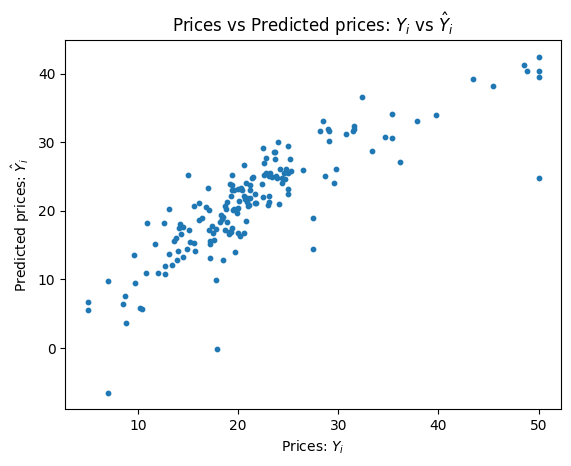

In [ ]:
plt.scatter(y_true, y_hat, s=10)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

### 라쏘회귀를 이용한 분석

In [ ]:
# Linear Regression 모델
from sklearn import linear_model

# Lasso 모델
lasso_regr = linear_model.Lasso(alpha=0.01, fit_intercept=True, copy_X=True)

lasso_regr.fit(X_train, y_train)

print('Coefficients: ', lasso_regr.coef_)
print('intercept: ', lasso_regr.intercept_)

Coefficients:  [-2.17419175  0.71927605  0.26362619  0.65168826 -1.52049956  4.0629954
 -0.23958775 -3.05850101  1.01189314 -0.79368718 -1.73305776  0.92566938
 -3.97655355]
intercept:  [25.35616529]


In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

y_true = y_test.copy()
y_hat = lasso_regr.predict(X_test)

r2_score(y_true, y_hat), mean_absolute_error(y_true, y_hat), mean_squared_error(y_true, y_hat)

(0.726313642738127, 3.141114807548394, 20.71217527947528)

Text(0.5, 1.0, 'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

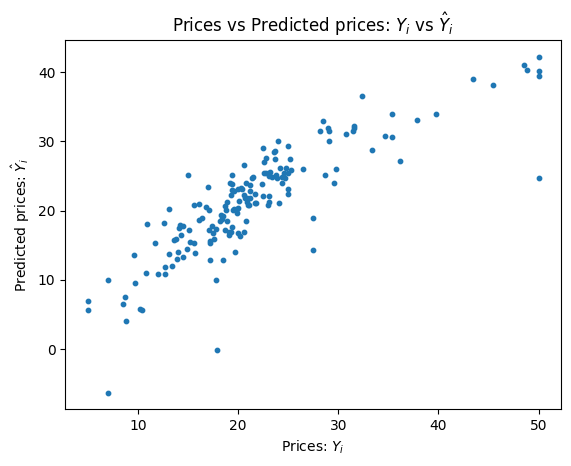

In [ ]:
plt.scatter(y_true, y_hat, s=10)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

### 릿지회귀와 SGD 선형회귀

In [ ]:
from sklearn import  linear_model

ridge_regr = linear_model.Ridge(
         alpha=0.01, fit_intercept=True,copy_X=True)
SGD__regr = linear_model.SGDRegressor(penalty="l2", alpha=0.01,
                                      max_iter=1000, tol=0.001, eta0=0.01)

### 과제 선형회귀를 위해 모든 피쳐를 사용하는 것이 올바른가?

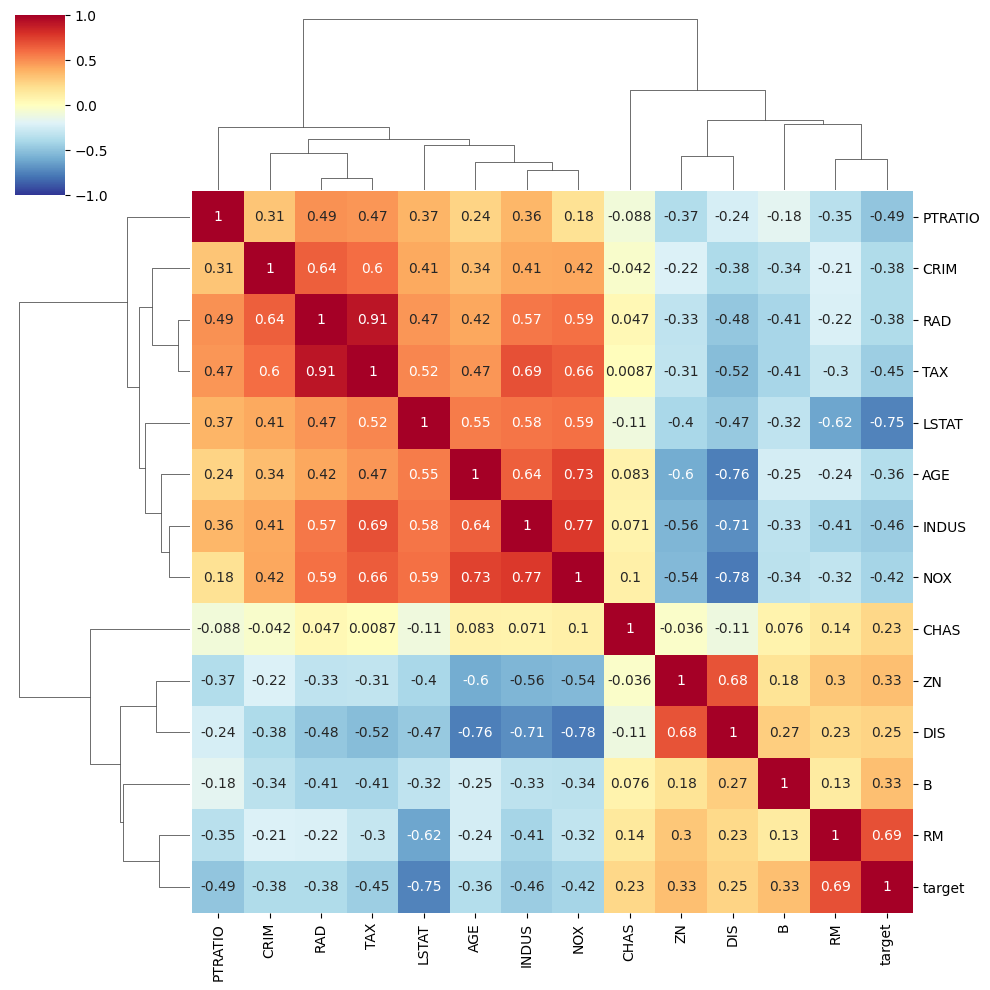

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

df = pd.DataFrame(X_train, columns=boston.feature_names)
df['target'] = y_train

corr_matrix = df.corr(numeric_only=True)

sns.clustermap(corr_matrix,
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              )

In [ ]:
abs(corr_matrix['target']).sort_values(ascending=False)

,target
target,1.000000
LSTAT,0.752219
RM,0.683256
PTRATIO,0.517496
INDUS,0.503437
TAX,0.463535
NOX,0.443886
AGE,0.402912
ZN,0.396919
CRIM,0.389312
